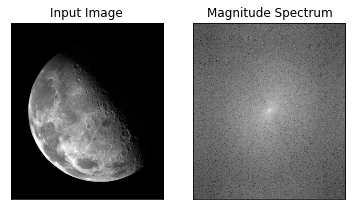

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Image/Moon.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Ideal lowpass Filters

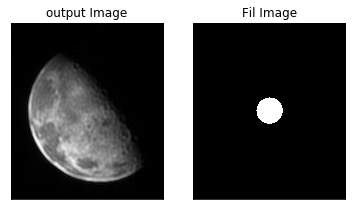

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Image/Moon.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
imgbuild = np.zeros([rows,cols, 2], dtype=np.uint8)
filtter=np.zeros([rows,cols])
d0 = 40 
for u in range(0, rows):
    for v in range(0, cols):
        one = (((v - cols/2)**2)+ ((u - rows/2)**2))**0.5 
        if one <= d0:
            imgbuild[u][v] = 1  
            filtter[u][v]=1
        else:
            imgbuild[u][v] = 0
            filtter[u][v]=0
multiimg = dft_shift * imgbuild 
f_ishift = np.fft.ifftshift(multiimg)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtter, cmap = 'gray')
plt.title('Fil Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Gaussian  Lowpass Filters


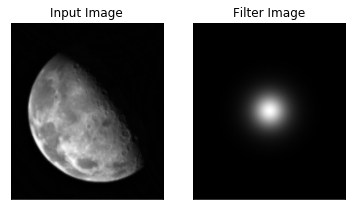

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math 
img = cv2.imread('Image/Moon.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
imgbuild = np.zeros([rows,cols, 2], dtype=np.uint8)
filtter = np.zeros([rows,cols])
d0 = 40
e=20
for u in range(0, rows):
    for v in range(0, cols): 
        r = e**(math.exp(-((((v - cols/2)**2 + (u - rows/2)**2)**0.5)**2)/(2*d0)**2))
        imgbuild[u][v] =e**(math.exp(-((((v - cols/2)**2 + (u - rows/2)**2)**0.5)**2)/(2*d0)**2))
        filtter [u][v]= r        
multiimg = dft_shift * imgbuild 
f_ishift = np.fft.ifftshift(multiimg)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtter, cmap = 'gray')
plt.title('Filter Image'), plt.xticks([]), plt.yticks([])
plt.show()

 # Butterworth Lowpass Filters

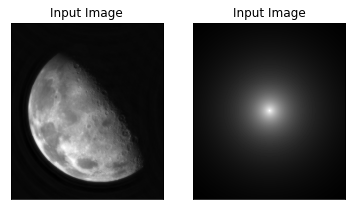

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Image/Moon.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
imgbuild = np.zeros([rows,cols, 2], dtype=np.uint8)
filtter = np.zeros([rows,cols])
d0 = 100
n=5
for u in range(0, rows):
    for v in range(0, cols): 
        r = 1/(1+(((v - cols/2)**2 + (u - rows/2)**2)**0.5)/d0)**2*n
        imgbuild[u][v] = 1/(1+(((v - cols/2)**2 + (u - rows/2)**2)**0.5)/d0)**2*n
        filtter [u][v]= r        
multiimg = dft_shift * imgbuild 
f_ishift = np.fft.ifftshift(multiimg)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtter, cmap = 'gray')
plt.title('filtter Image'), plt.xticks([]), plt.yticks([])
plt.show()

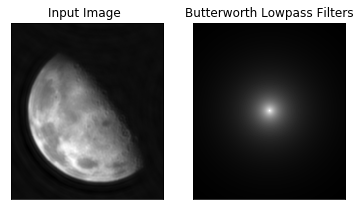